
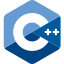
<br>

<div style="text-align:center; font-size:200%;">
 <b>Was sind gute Tests?</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 04 Was sind gute Tests.ipynb -->
<!-- slides/module_410_unit_testing/topic_130_good_tests.cpp -->


<img src="img/velocity-tests-03.png"
     alt="Velocity vs. Tests 3"
     style="width: 75%; margin-left: auto; margin-right: auto;"/>


## Welche Eigenschaften sollte ein Test haben?

<ul>
<li class="fragment">Zeigt viele Fehler/Regressionen im Code auf</li>
<li class="fragment">Gibt schnelle Rückmeldung</li>
<li class="fragment">Ist deterministisch</li>
<li class="fragment">Ist leicht zu warten und verstehen</li>
<li class="fragment"><b>Unempfindlich gegenüber Refactorings</b></li>
</ul>

<p class="fragment">
  Leider stehen diese Eigenschaften oft im Konflikt zueinander!
</p>


## Aufzeigen von Fehlern/Regressionen

### Einflüsse

<ul>
  <li class="fragment">Menge des abgedeckten Codes</li>
  <li class="fragment">Komplexität des abgedeckten Codes</li>
  <li class="fragment">Interaktion mit externen Systemen</li>
  <li class="fragment">Signifikanz des abgedeckten Codes für die Domäne/das
  System</li>
</ul>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
class Item
{
private:
    std::string name;
    double price; // always positive

public:
    Item(std::string name, double price) : name{name} { setPrice(price); }

    std::string getName() const { return name; }

    double getPrice() const { return price; }
    void setPrice(double value);
};

In [ ]:
void Item::setPrice(double value)
{
    if (value < 0)
    {
        value = -value;
    }
    price = value;
}

In [ ]:
namespace std
{
std::ostream& operator<<(std::ostream& os, const Item& item)
{
    os << "Item(" << item.getName() << ", " << item.getPrice() << ")";
    return os;
}
} // namespace std

In [ ]:
#include <initializer_list>
#include <vector>

In [ ]:
class Order
{
private:
    std::vector<Item> items;

public:
    Order(std::initializer_list<Item> itemList) : items{itemList} {}

    std::vector<Item> getItems() const { return items; }
    double getTotal() const;
};

In [ ]:
#include <numeric>

In [ ]:
double Order::getTotal() const
{
    return std::accumulate(
        items.begin(), items.end(), 0.0,
        [](double sum, const Item& item) { return sum + item.getPrice(); }
    );
}

In [ ]:
namespace std
{
std::ostream& operator<<(std::ostream& os, const Order& order)
{
    os << "Order(";
    std::string sep{""};
    for (const auto& item : order.getItems())
    {
        os << sep << item;
        sep = ", ";
    }
    os << "), total = " << order.getTotal();
    return os;
}
} // namespace std

In [ ]:
#include <iostream>

In [ ]:
void check(bool condition, std::string message = "Test failed!")
{
    if (!condition)
    {
        std::cerr << message << "\n";
    }
}

In [ ]:
void testItemName()
{
    Item unit{"Apple", 1.0};

    check(unit.getName() == "Apple");
    std::cout << "Success.\n";
}

In [ ]:
testItemName();

In [ ]:
void testOrderTotal()
{
    Order unit{
        {"Apple", 1.0},
        {"Banana", -2.0},
    };

    double total{unit.getTotal()};

    check(total == 3.0);
    std::cout << "Success!\n";
}

In [ ]:
testOrderTotal();

In [ ]:
void testOrderOutput()
{
    Order unit{
        {"Apple", 1.0},
        {"Banana", -2.0},
    };
    std::stringstream ss;

    ss << unit;

    check(ss.str() == "Order(Item(Apple, 1), Item(Banana, 2)), total = 3");
    std::cout << "Success!\n";
}

In [ ]:
testOrderOutput();


## Schnelle Rückmeldung

### Einflüsse

- Menge des abgedeckten Codes
- Komplexität/Anzahl Iterationen des abgedeckten Codes
- Interaktion mit externen Systemen


## Deterministisch

<ul>
  <li class="fragment">Gleicher Code führt immer zum gleichen Ergebnis</li>
  <li class="fragment">Gründe für Nichtdeterminismus
    <ul>
      <li class="fragment">Zufallszahlen</li>
      <li class="fragment">Zeit/Datum</li>
      <li class="fragment">Interaktion mit externen Systemen</li>
      <li class="fragment">Nicht initialisierte Variablen</li>
      <li class="fragment">Kommunikation zwischen Tests</li>
    </ul>
  </li>
  <li class="fragment">
     Tests, die falsche Warnungen erzeugen sind nicht
     hilfreich sondern schädlich!
  </li>
<ul>

In [ ]:
#include <random>

In [ ]:
void testRandomBad()
{
    std::random_device rd;
    std::mt19937 gen{rd()};
    std::uniform_int_distribution<> unit{1, 2};

    int roll{unit(gen)};

    check(roll == 1);
    std::cout << "Success!\n";
}

In [ ]:
testRandomBad();

In [ ]:
void testRandomBetter()
{
    std::mt19937 gen{42};  // <= Fixed seed!
    std::uniform_int_distribution<> unit{1, 2};

    int roll{unit(gen)};

    check(roll == 1);
    std::cout << "Success!\n";
}

In [ ]:
testRandomBetter();

In [ ]:
void testDateBad()
{
    std::time_t now{std::time(nullptr)};
    std::tm* unit{std::localtime(&now)};

    check(unit->tm_year == 124);
    check(unit->tm_sec % 2 == 0);
    std::cout << "Success!\n";
}

In [ ]:
testDateBad();

In [ ]:
void testDateBetter()
{
    std::tm unit{0, 0, 0, 1, 0, 124}; // 2024-01-01 00:00:00

    check(unit.tm_year == 124);
    check(unit.tm_sec % 2 == 0);
    std::cout << "Success!\n";
}

In [ ]:
testDateBetter();


## Leicht zu warten

<ul>
  <li>Einfache, standardisierte Struktur<br>
    <table style="display:inline;margin:20px 20px;">
    <tr><td style="text-align:left;width:60px;padding-left:15px;">Arrange</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">Given</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
          Bereite das Test-Environment vor</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Act</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">
           When</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
           Führe die getestete Aktion aus (falls vorhanden)</td></tr>
    <tr><td style="text-align:left;padding-left:15px;">Assert</td>
        <td style="text-align:left;width:60px;padding-left:15px;border-left:1px solid black;">
           Then</td>
        <td style="text-align:left;width:300px;padding-left:15px;border-left:1px solid black;">
           Überprüfe die Ergebnisse</td></tr>
    </table>
  </li>
  <li>Wenig Code
    <ul>
      <li>Wenig Boilerplate</li>
      <li>Factories, etc. für Tests</li>
    </ul>
  </li>
</ul>


## Unempfindlich gegenüber Refactorings

- Möglichst wenige falsche Positive!
- Typischerweise vorhanden oder nicht, wenig Zwischenstufen

### Einflüsse

- Bezug zu Domäne/System
- Zugriff auf interne Strukturen

In [ ]:
#define private public

In [ ]:
class VeryPrivate
{
private:
    int secret{42};
}

In [ ]:
#undef private

In [ ]:
void testVeryPrivate()
{
    VeryPrivate unit;

    check(unit.secret == 42);
    std::cout << "Success!\n";
}

In [ ]:
testVeryPrivate();


Die folgenden Einflüsse stehen im Konflikt zueinander:

- Erkennen von Fehlern/Regressionen
- Schnelle Rückmeldung
- Unempfindlich gegenüber Refactorings

Die Qualität eines Tests hängt vom *Produkt* dieser Faktoren ab!


## Wie finden wir den Trade-Off?

- Unempfindlich gegenüber Refactorings kann *nie* geopfert werden
- Wir müssen also einen Kompromiss finden zwischen
  - Erkennen von Fehlern/Regressionen
  - Schnelle Rückmeldung

### Typischerweise

- Schnelles Feedback für die meisten Tests (Unit-Tests)
- Gründliche Fehlererkennung für wenige Tests (Integrationstests)